<a href="https://www.kaggle.com/code/francescoliveras/ps-s3-e25-eda-model-en-es?scriptVersionId=152123974" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S3 E25 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Prediction of Mohs Hardness with Machine Learning dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Archivos**

* ```train.csv``` - the training dataset; Hardness is the continuous target
* ```test.csv``` -  the test dataset; your objective is to predict the value of Hardness
* ```sample_submission.csv``` - a sample submission file in the correct format


**🟥ES**:

El conjunto de datos para esta competición (tanto de entrenamiento como de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos Smoker Status Prediction using Bio-Signals. Las distribuciones de las características son similares, aunque no exactamente iguales, a las del original. Siéntase libre de utilizar el conjunto de datos original como parte de esta competición, tanto para explorar las diferencias como para ver si la incorporación del original en el entrenamiento mejora el rendimiento del modelo.

**Archivos

* ```train.csv``` - el conjunto de datos de entrenamiento; la dureza es el objetivo continuo
* ```test.csv``` - el conjunto de datos de prueba; su objetivo es predecir el valor de Dureza
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
!pip install -q scikit-lego

In [2]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import tensorflow as tf
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import tensorflow_probability as tfp
import tensorflow_decision_forests as tfdf

from sklearn.base import clone
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA
from catboost import CatBoostRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from scipy.spatial.distance import squareform
from sklego.linear_model import LADRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.ensemble import HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import median_absolute_error, roc_auc_score, roc_curve

In [3]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

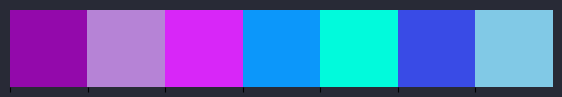

In [4]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]


sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.set_palette(PALETTE_7_C)
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [5]:
PS_PATH = "/kaggle/input/playground-series-s3e25"
ORIGINAL_PATH = "/kaggle/input/prediction-of-mohs-hardness-with-machine-learning/jm79zfps6b-1"

PS_TRAIN_FILENAME = "train.csv"
PS_TEST_FILENAME = "test.csv"
OR_ARTIFICIAL_CRYSTAL = "Artificial_Crystals_Dataset.csv"
OR_MINERAL_DATASET = "Mineral_Dataset_Supplementary_Info.csv"
SAMPLE_SUBMISSION_FILENAME = "sample_submission.csv"

TRAIN_PS_PATH = os.path.join(PS_PATH, PS_TRAIN_FILENAME)
TEST_PS_PATH = os.path.join(PS_PATH, PS_TEST_FILENAME)
CRYSTAL_ART_PATH = os.path.join(ORIGINAL_PATH, OR_ARTIFICIAL_CRYSTAL)
MINERAL_PATH = os.path.join(ORIGINAL_PATH, OR_MINERAL_DATASET)
SUBMISSION_PATH = os.path.join(PS_PATH, SAMPLE_SUBMISSION_FILENAME)

In [6]:
TARGET = "Hardness"
ID = "id"
ALLELECTRONS_AVERAGE = 'allelectrons_Average'

EARLY_STOPPING_ROUNDS = 50
VERBOSE_EVAL = 100
N_ROUND = 1000
TRAIN_LBL = "train"
TEST_LBL = "test"


INCLUDE_ORIGINAL = True
SEED = 500
FOLDS = 6 # 5
N_SPLITS = 6 # 5
TEST_SIZE = 0.18
TIMEOUT = 10 * 36007
ON = "on"
LR = 0.00001
SUBSAMPLE = 0.95

# nn Constants
ACTIVATION = "relu"
ESLN = 0.00001
LYS = 16
TEST_SIZE = 0.1
EPOCHS = 400

MONITOR = "val_loss"
MODE = "min"

In [7]:

callbacks_list = [
    tf.keras.callbacks.EarlyStopping(monitor=MONITOR, patience=50, verbose=2, mode=MODE ,restore_best_weights=True),
    tf.keras.callbacks.ReduceLROnPlateau(monitor=MONITOR, factor=0.8, patience=3, min_lr=LR),
    tf.keras.callbacks.TerminateOnNaN()
] 

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [8]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 25:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [9]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [10]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query(f"set=={TRAIN_LBL}"),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [11]:
def pie_plot(df: pd.DataFrame, hover_temp: str = "Status: ",
            feature=TARGET, palette=[LIGTH_BLUE,"#221e8f"], color=[BLUE ,PURPLE_DARJ],
            title_="Target distribution"):
#     df[feature] = df[feature].replace({0: "Not cancelled ", 1: "Cancelled"})
    target = df[[feature]].value_counts(normalize=True).sort_index().round(decimals=3)*100
    fig = go.Figure()
    
    fig.add_trace(go.Pie(labels=target.index, values=target, hole=.4,
                        sort=False, showlegend=True, marker=dict(colors=color, line=dict(color=palette,width=2)),
                        hovertemplate = "%{label} " + hover_temp + ": %{value:.2f}%<extra></extra>"))
    
    fig.update_layout(template=font_family, title=title_, 
                  legend=dict(traceorder="reversed",y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode="hide",height=600)
    fig.show()

In [12]:
def cat_distribution(cat_features, df, title = "Distribution of categorical\nfeatures in train dataset\n\n\n"):
    fig, ax = plt.subplots(4, 2, figsize = (16, 20), dpi = 300)
    #ax = ax.flatten()

    for i, column in enumerate(cat_features):

        ax[i][0].pie(
            df[column].value_counts(), 
            shadow = True, 
            explode = [.1 for i in range(df[column].nunique())], 
            autopct = '%1.f%%',
            textprops = {'size' : 14, 'color' : 'white'}
        )

        sns.countplot(data = df, y = column, ax = ax[i][1], palette = PALETTE_7_C, order = df[column].value_counts().index)
        ax[i][1].yaxis.label.set_size(20)
        plt.yticks(fontsize = 12)
        ax[i][1].set_xlabel('Count in Train', fontsize = 15)
        ax[i][1].set_ylabel(f'{column}', fontsize = 15)
        plt.xticks(fontsize = 12)

    fig.suptitle(title, fontsize = 25, fontweight = "bold")
    plt.tight_layout()

In [13]:
def dist_tree(data, label = ""):
    corr = data.corr(method = "spearman")
    d_lk = linkage(squareform(1 - abs(corr)), "complete")
    
    plt.figure(figsize = (8, 6), dpi = 250)
    dendro = dendrogram(d_lk, labels=data.columns, leaf_rotation=75)
    plt.title(f"Feature Distance in {label}", weight = "bold", size = 23)
    plt.show()

In [14]:
def loss_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=50)

In [15]:
def metric_fn(y_true, y_pred):
    return tfp.stats.percentile(tf.abs(y_true - y_pred), q=100) - tfp.stats.percentile(tf.abs(y_true - y_pred), q=0)

In [16]:
# Seen in https://www.kaggle.com/code/tonyyunyang99/luck-is-all-you-need thx <3
def nn_model(): 
    input_l = tf.keras.Input(shape=(len(features), ))
    layer_1 = tf.keras.layers.BatchNormalization(epsilon=ESLN)(input_l)
    layer_2 = tf.keras.layers.Dense(LYS, activation=ACTIVATION)(layer_1)
    layer_3 = tf.keras.layers.Dense(LYS*2, activation=ACTIVATION)(layer_2)
    output_l = tf.keras.layers.Dense(1)(layer_3)   
    
    model = tf.keras.Model(inputs=input_l, outputs=output_l)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.013, beta_1=0.5),
              loss=loss_fn,
              metrics=metric_fn)
    
    return model

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [17]:
train_ps_df = pd.read_csv(TRAIN_PS_PATH, index_col="id")
test_ps_df = pd.read_csv(TEST_PS_PATH, index_col="id")
crystal_df = pd.read_csv(CRYSTAL_ART_PATH)
mineral_df = pd.read_csv(MINERAL_PATH, index_col=0)
submission_df = pd.read_csv(SUBMISSION_PATH)

In [18]:
def cvs(estimator, cv = KFold(shuffle = True, random_state = SEED), m_name = "", concat_org = True, train_or_df = mineral_df):
    
    X = train_df.copy()
    y = X.pop(TARGET)
    
    prediction_vals = np.zeros((len(train_df)))
    scrs, validation_srcs = [], []
    
    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        
        model = clone(estimator)
        
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_val = X.iloc[val_idx]
        y_val = y.iloc[val_idx]
        
        if concat_org:
            X_train = pd.concat([X_train, train_or_df.drop(TARGET, axis = 1)]).reset_index(drop = True)
            y_train = pd.concat([y_train, train_or_df.Hardness]).reset_index(drop = True)
        
        model.fit(X_train, y_train)   
        train_preds = model.predict(X_train)
        
        pred_vals = model.predict(X_val)   
        prediction_vals[val_idx] += pred_vals
        
        train_src = median_absolute_error(y_train, train_preds)
        validation_src = median_absolute_error(y_val, pred_vals)
        
        scrs.append(train_src)
        validation_srcs.append(validation_src)
    
    print(f"\n\n{blue}{m_name.upper()}{res}\n" + f"{mgta}={res}" * 40 + f"\n{cyn}Validation Score:{res} {red}{np.mean(validation_srcs):.5f} ± {np.std(validation_srcs):.5f}{res} \n{cyn}Train Score:{res} {red}{np.mean(scrs):.5f} ± {np.std(scrs):.5f}{res}")
    
    return validation_src, prediction_vals

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

In [19]:
data_description(train_ps_df)
data_description(test_ps_df)
data_description(crystal_df)
data_description(mineral_df)

Data description
Total number of records 10407
number of features 12


                     Name     Type  Unique levels  Missing
0      allelectrons_Total  float64            325        0
1           density_Total  float64           1099        0
2    allelectrons_Average  float64            629        0
3           val_e_Average  float64            205        0
4    atomicweight_Average  float64            849        0
5       ionenergy_Average  float64            898        0
6      el_neg_chi_Average  float64            745        0
7   R_vdw_element_Average  float64            737        0
8   R_cov_element_Average  float64            698        0
9         zaratio_Average  float64            815        0
10        density_Average  float64            599        0
11               Hardness  float64             50        0
Data description
Total number of records 6939
number of features 11


                     Name     Type  Unique levels  Missing
0      allelectrons_Total  float6

In [20]:
train_ps_df

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,,,,,,,,,,,,
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457,6.0
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760,6.5
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633,2.5
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937,6.0
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607,4.0
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480,5.0
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540,1.8


In [21]:
train_df = pd.concat(objs=[train_ps_df, mineral_df]).reset_index(drop=True)
train_df.shape

(11029, 12)

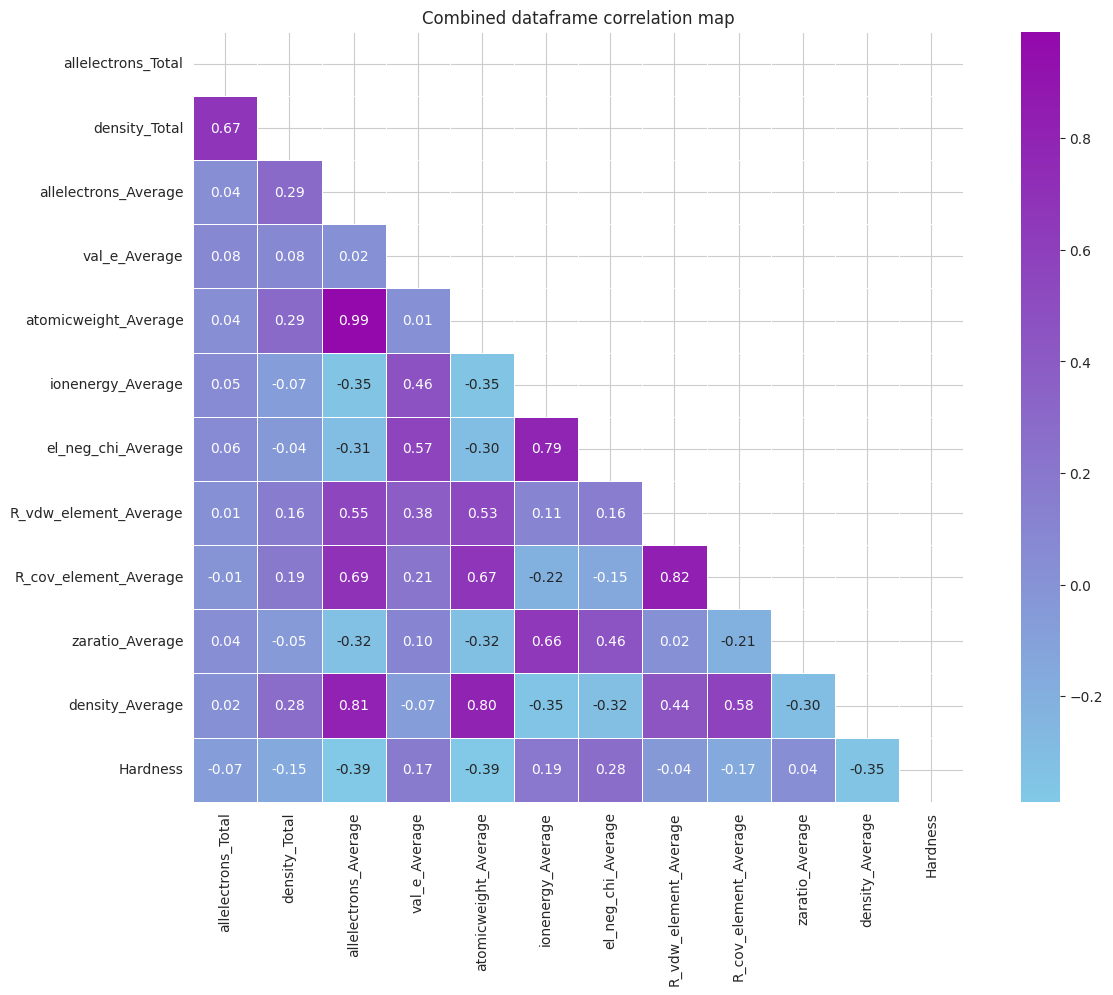

None

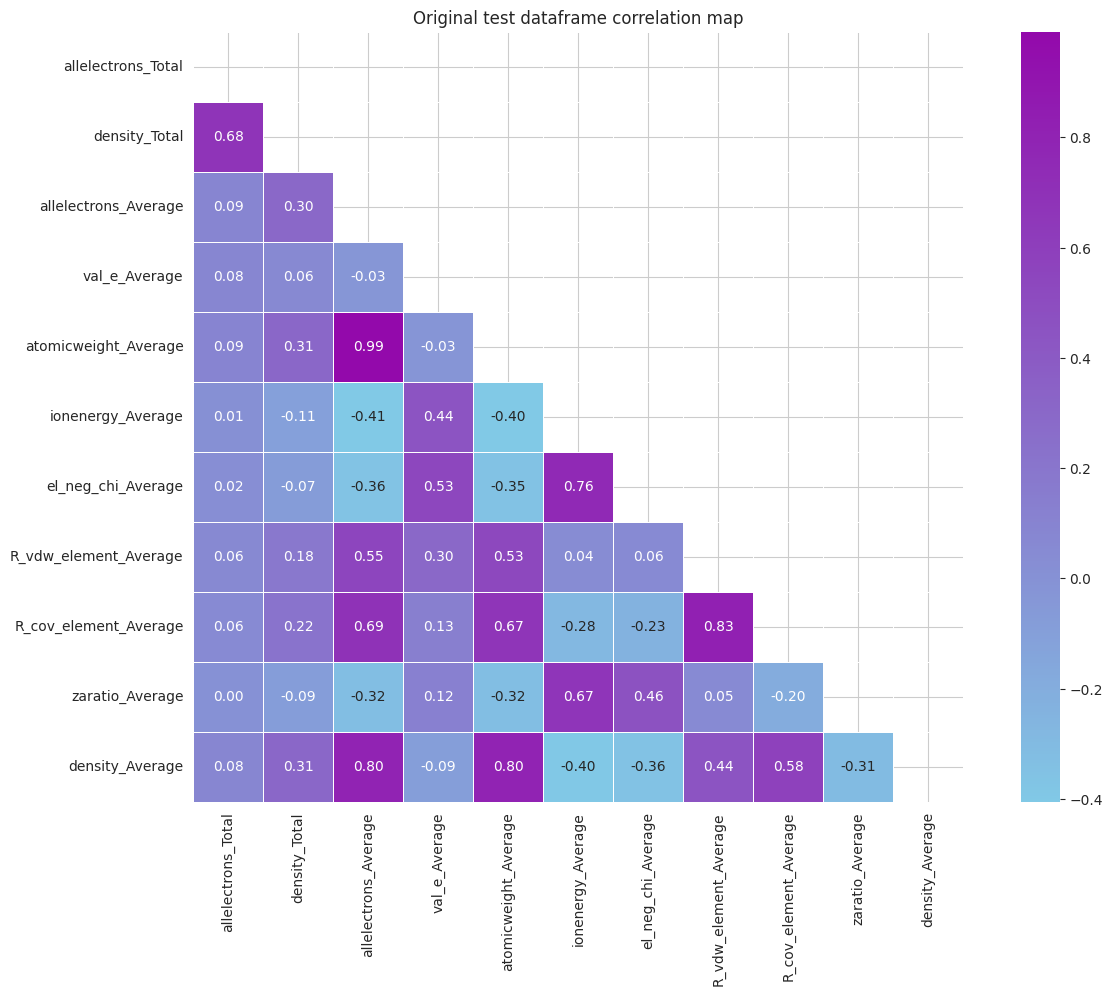

None

In [22]:
display(show_corr_heatmap(train_df, "Combined dataframe correlation map"))
display(show_corr_heatmap(test_ps_df, "Original test dataframe correlation map"))

In [23]:
num_features = list(test_ps_df)

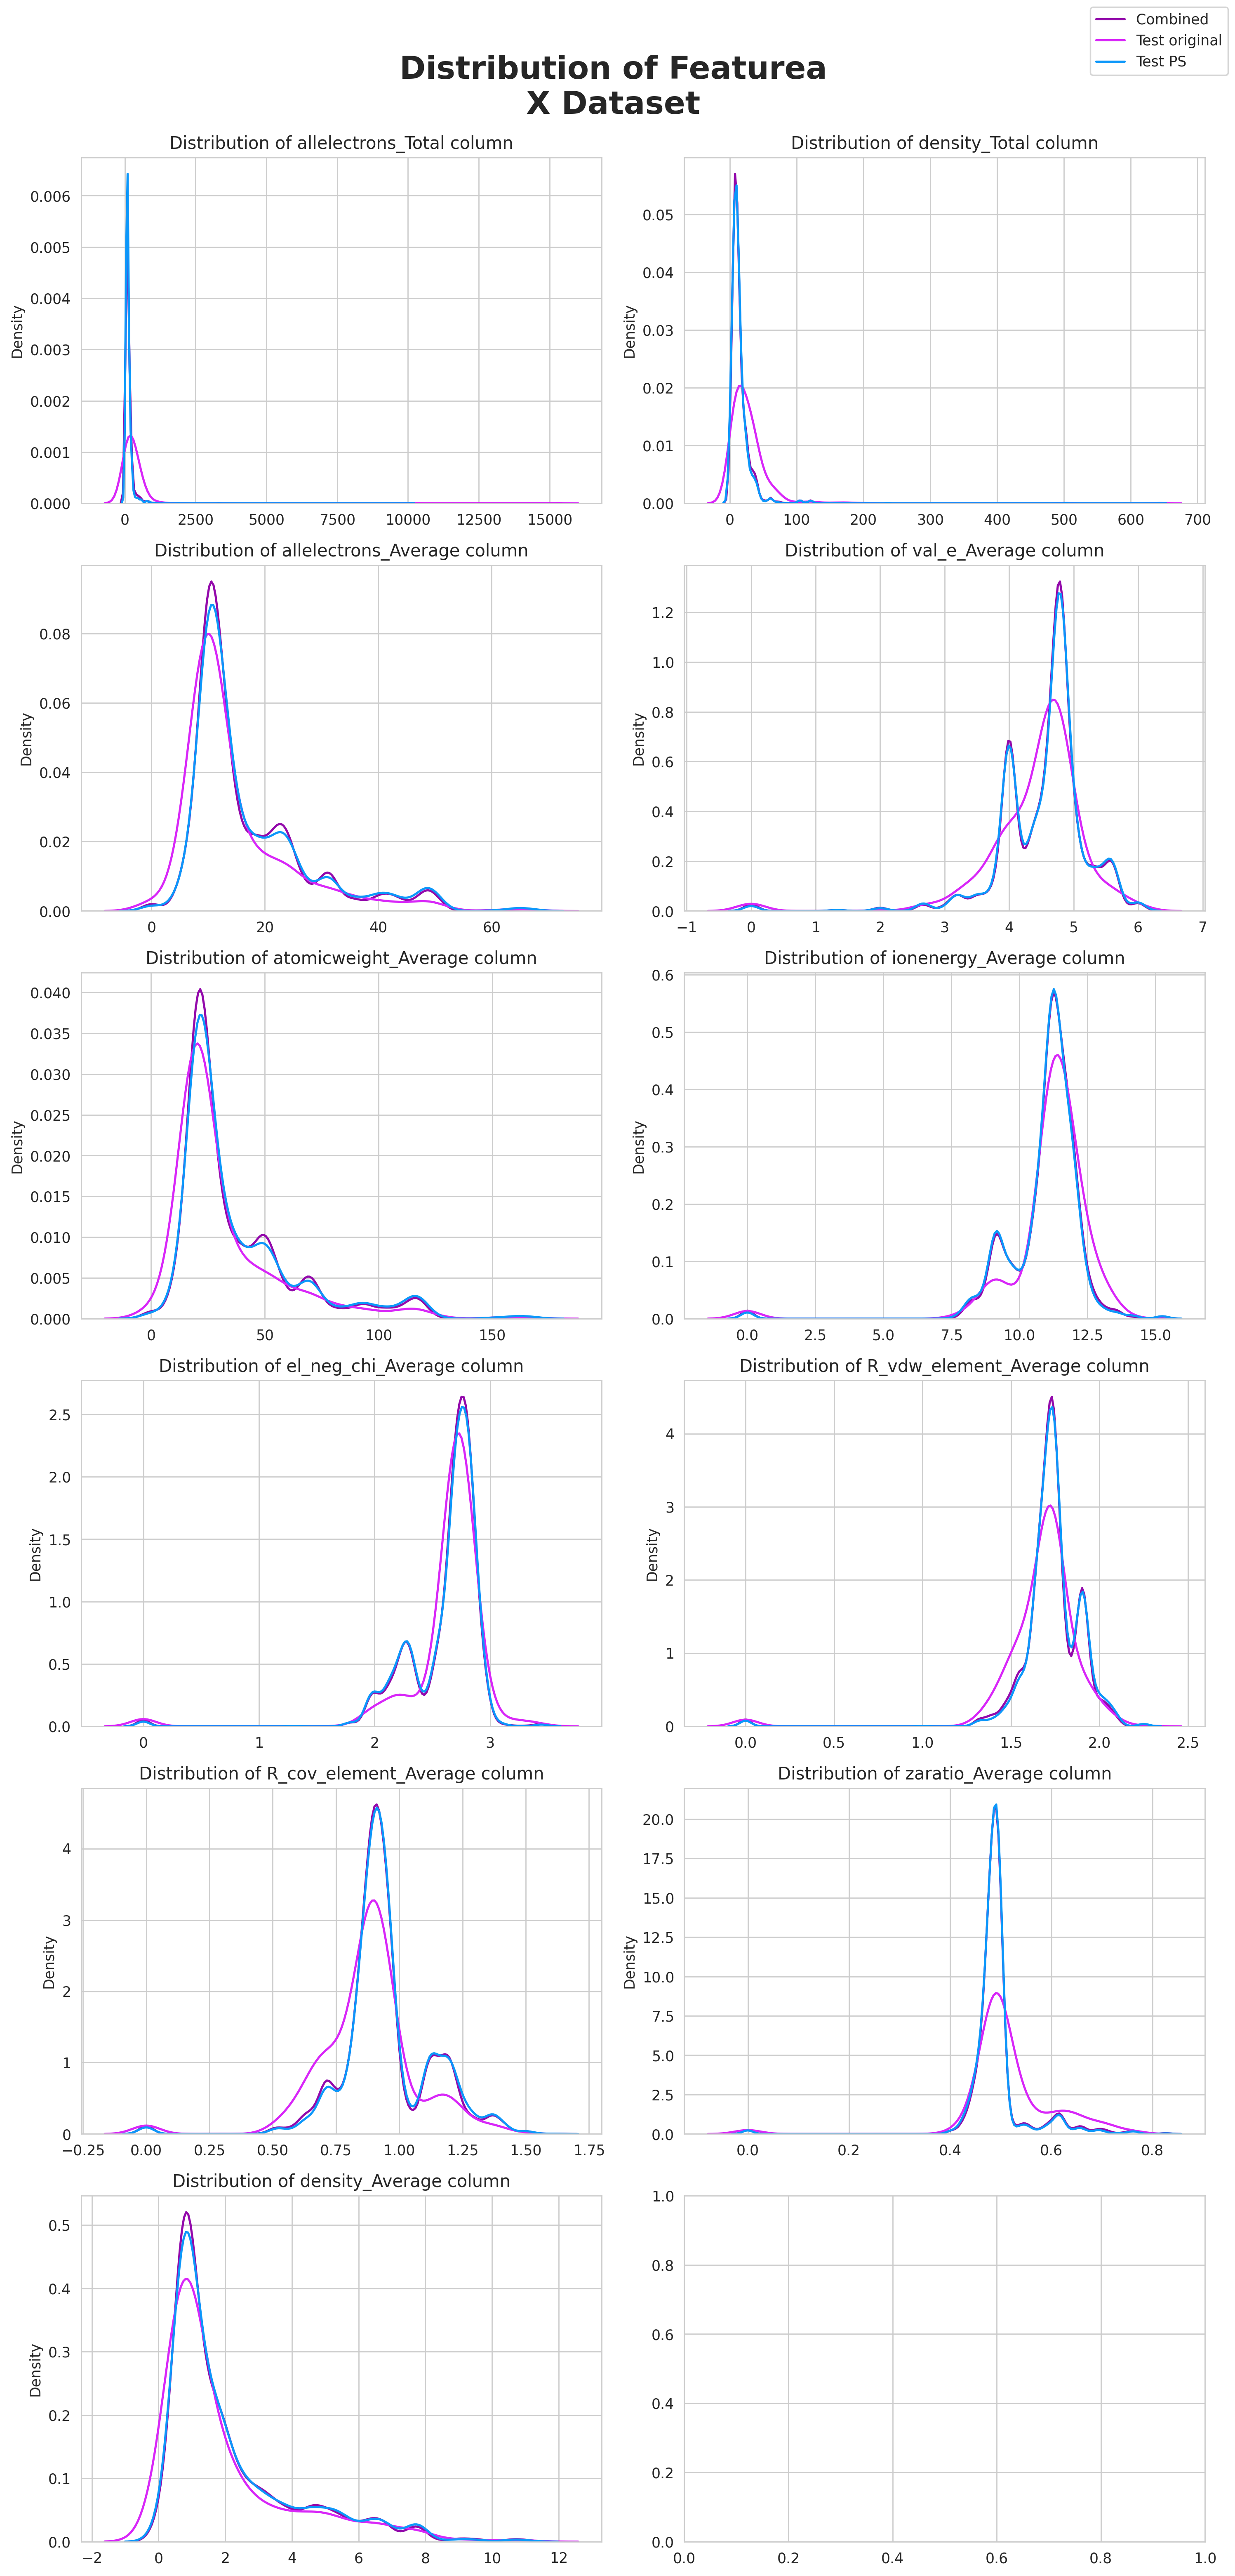

In [24]:
fig, ax = plt.subplots(int((len(num_features)/2)+1), 2, figsize = (12, 25), dpi = 250)
ax = ax.flatten()

for i, column in enumerate(num_features):
        
    sns.kdeplot(train_df[column], ax=ax[i], color=PALETTE_7_C[0])
    sns.kdeplot(mineral_df[column], ax=ax[i], color=PALETTE_7_C[2], warn_singular = False)
    sns.kdeplot(test_ps_df[column], ax=ax[i], color=PALETTE_7_C[1])
    
    ax[i].set_title(f"Distribution of {column} column", size = 12)
    ax[i].set_xlabel(None)
    
fig.suptitle("Distribution of Featurea\nX Dataset\n", fontsize = 22, fontweight = "bold")
fig.legend(["Combined", "Test original", "Test PS"])
plt.tight_layout()

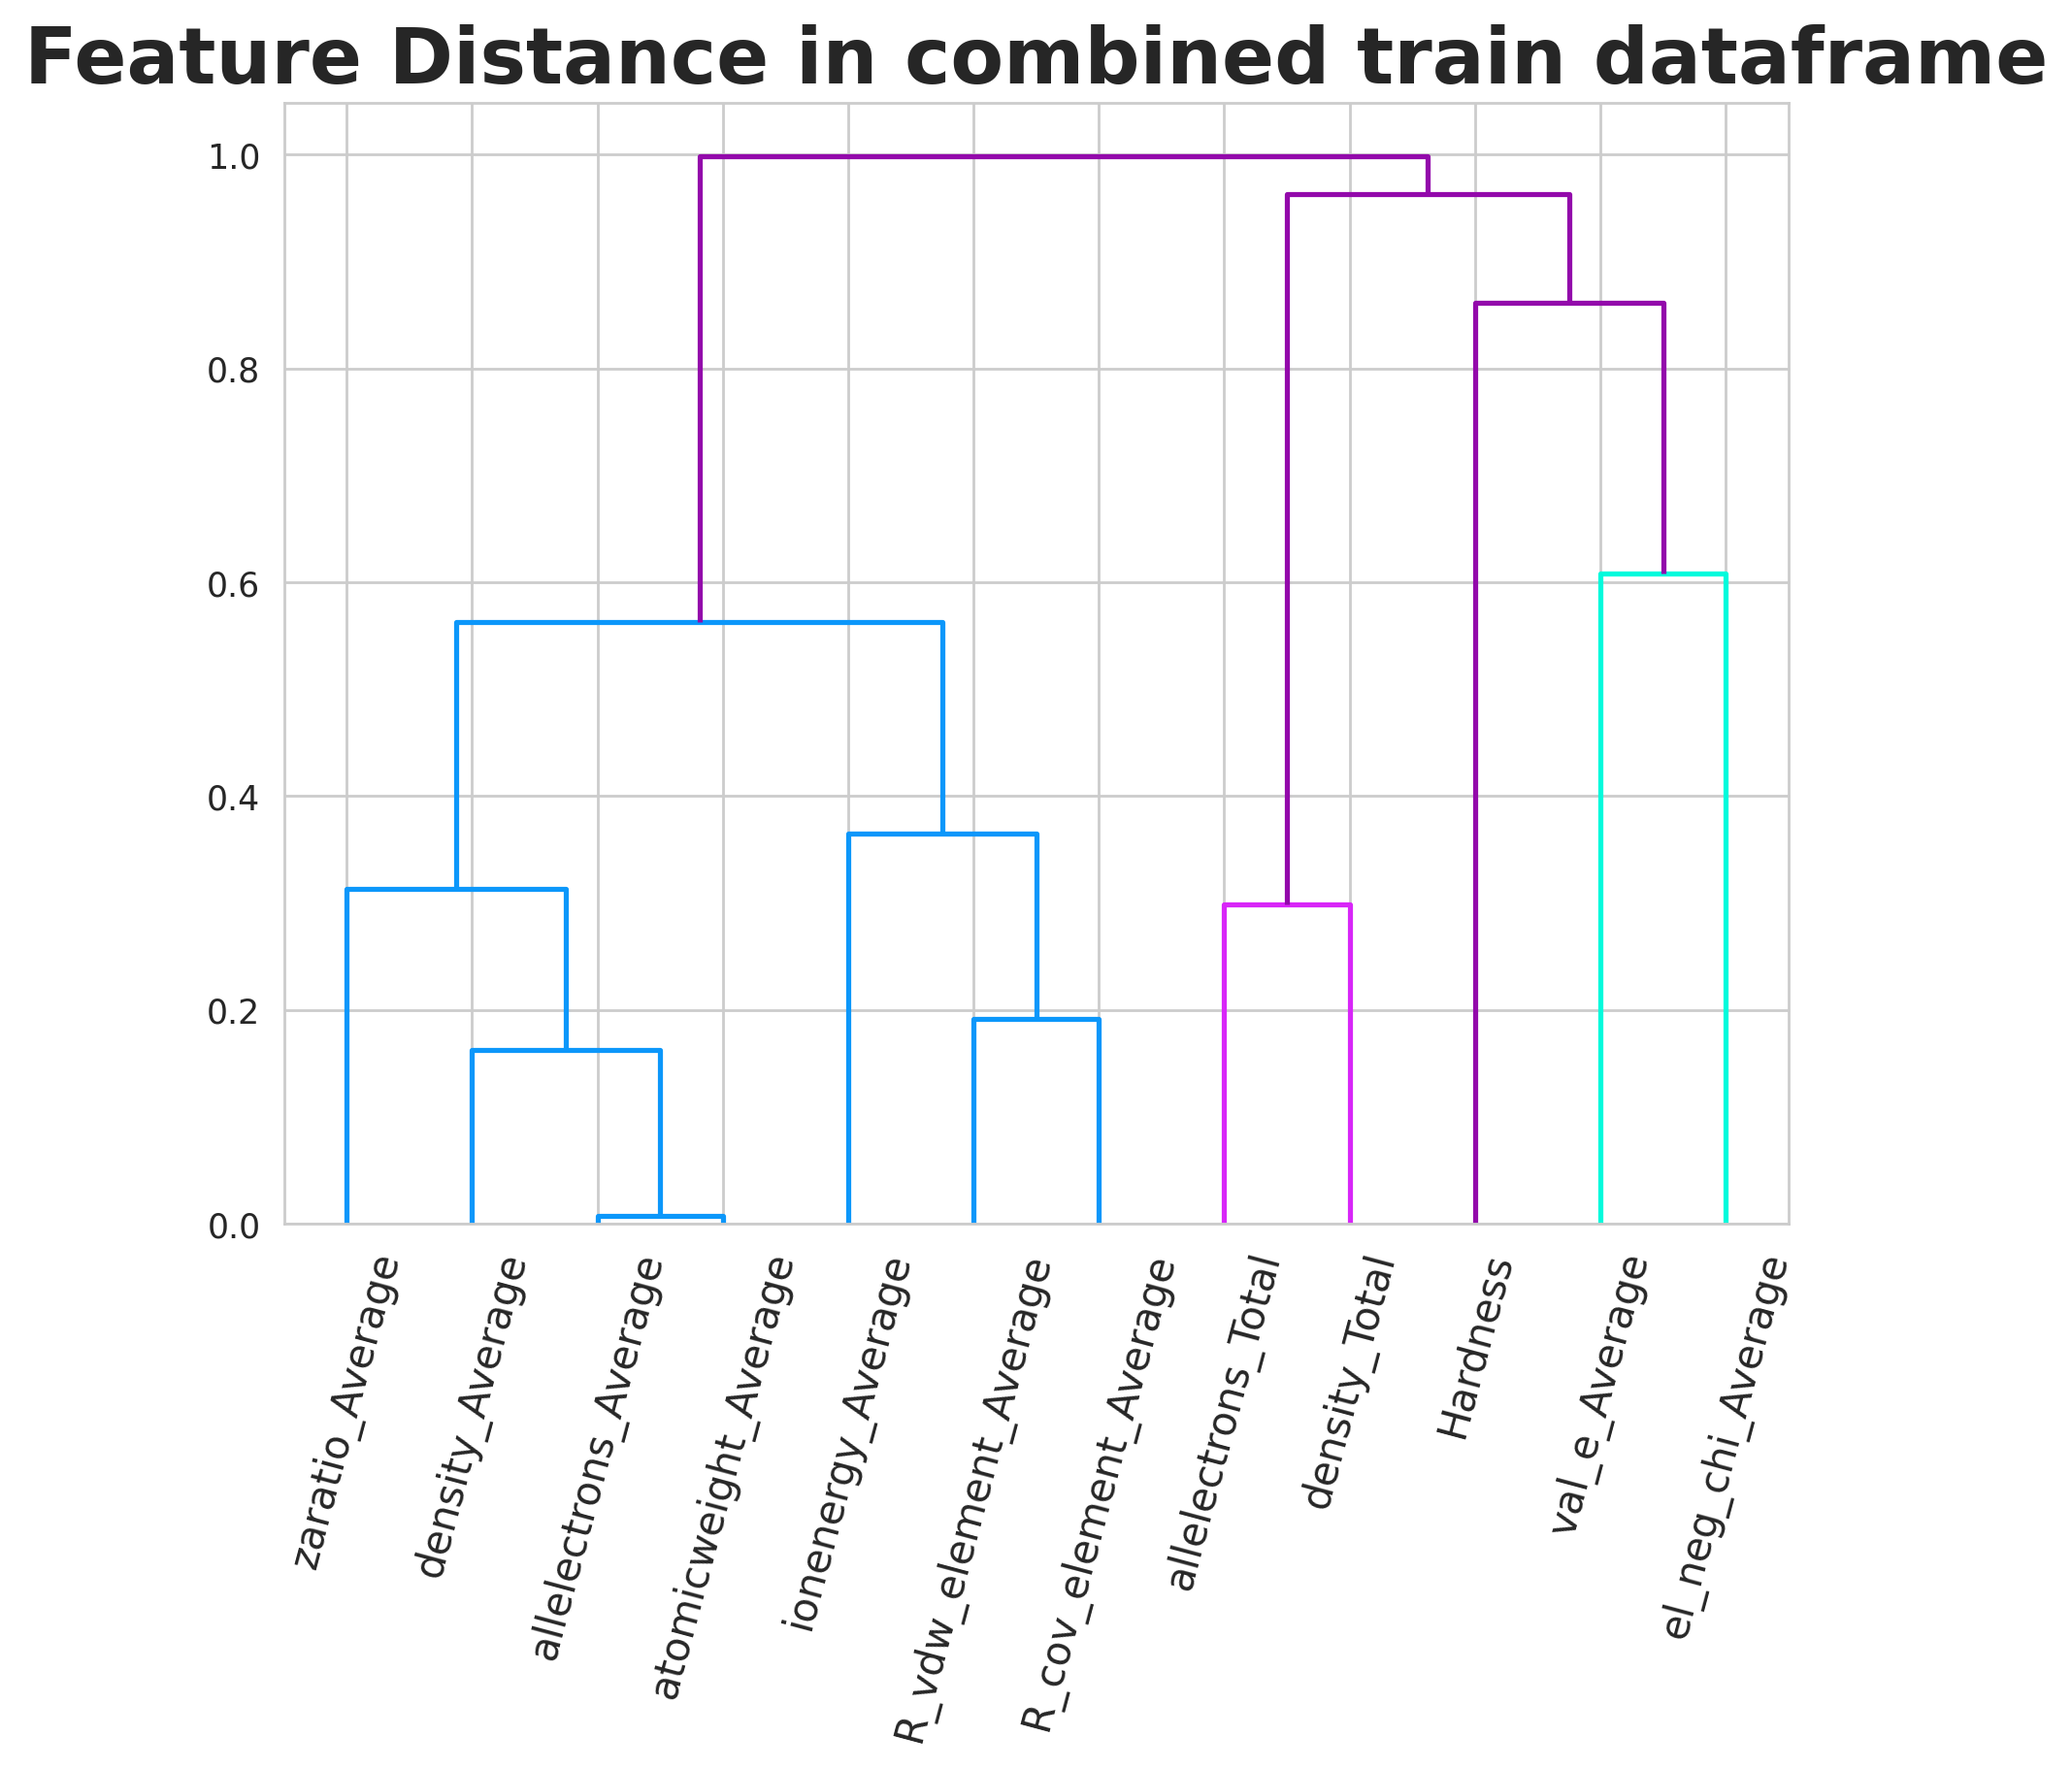

None

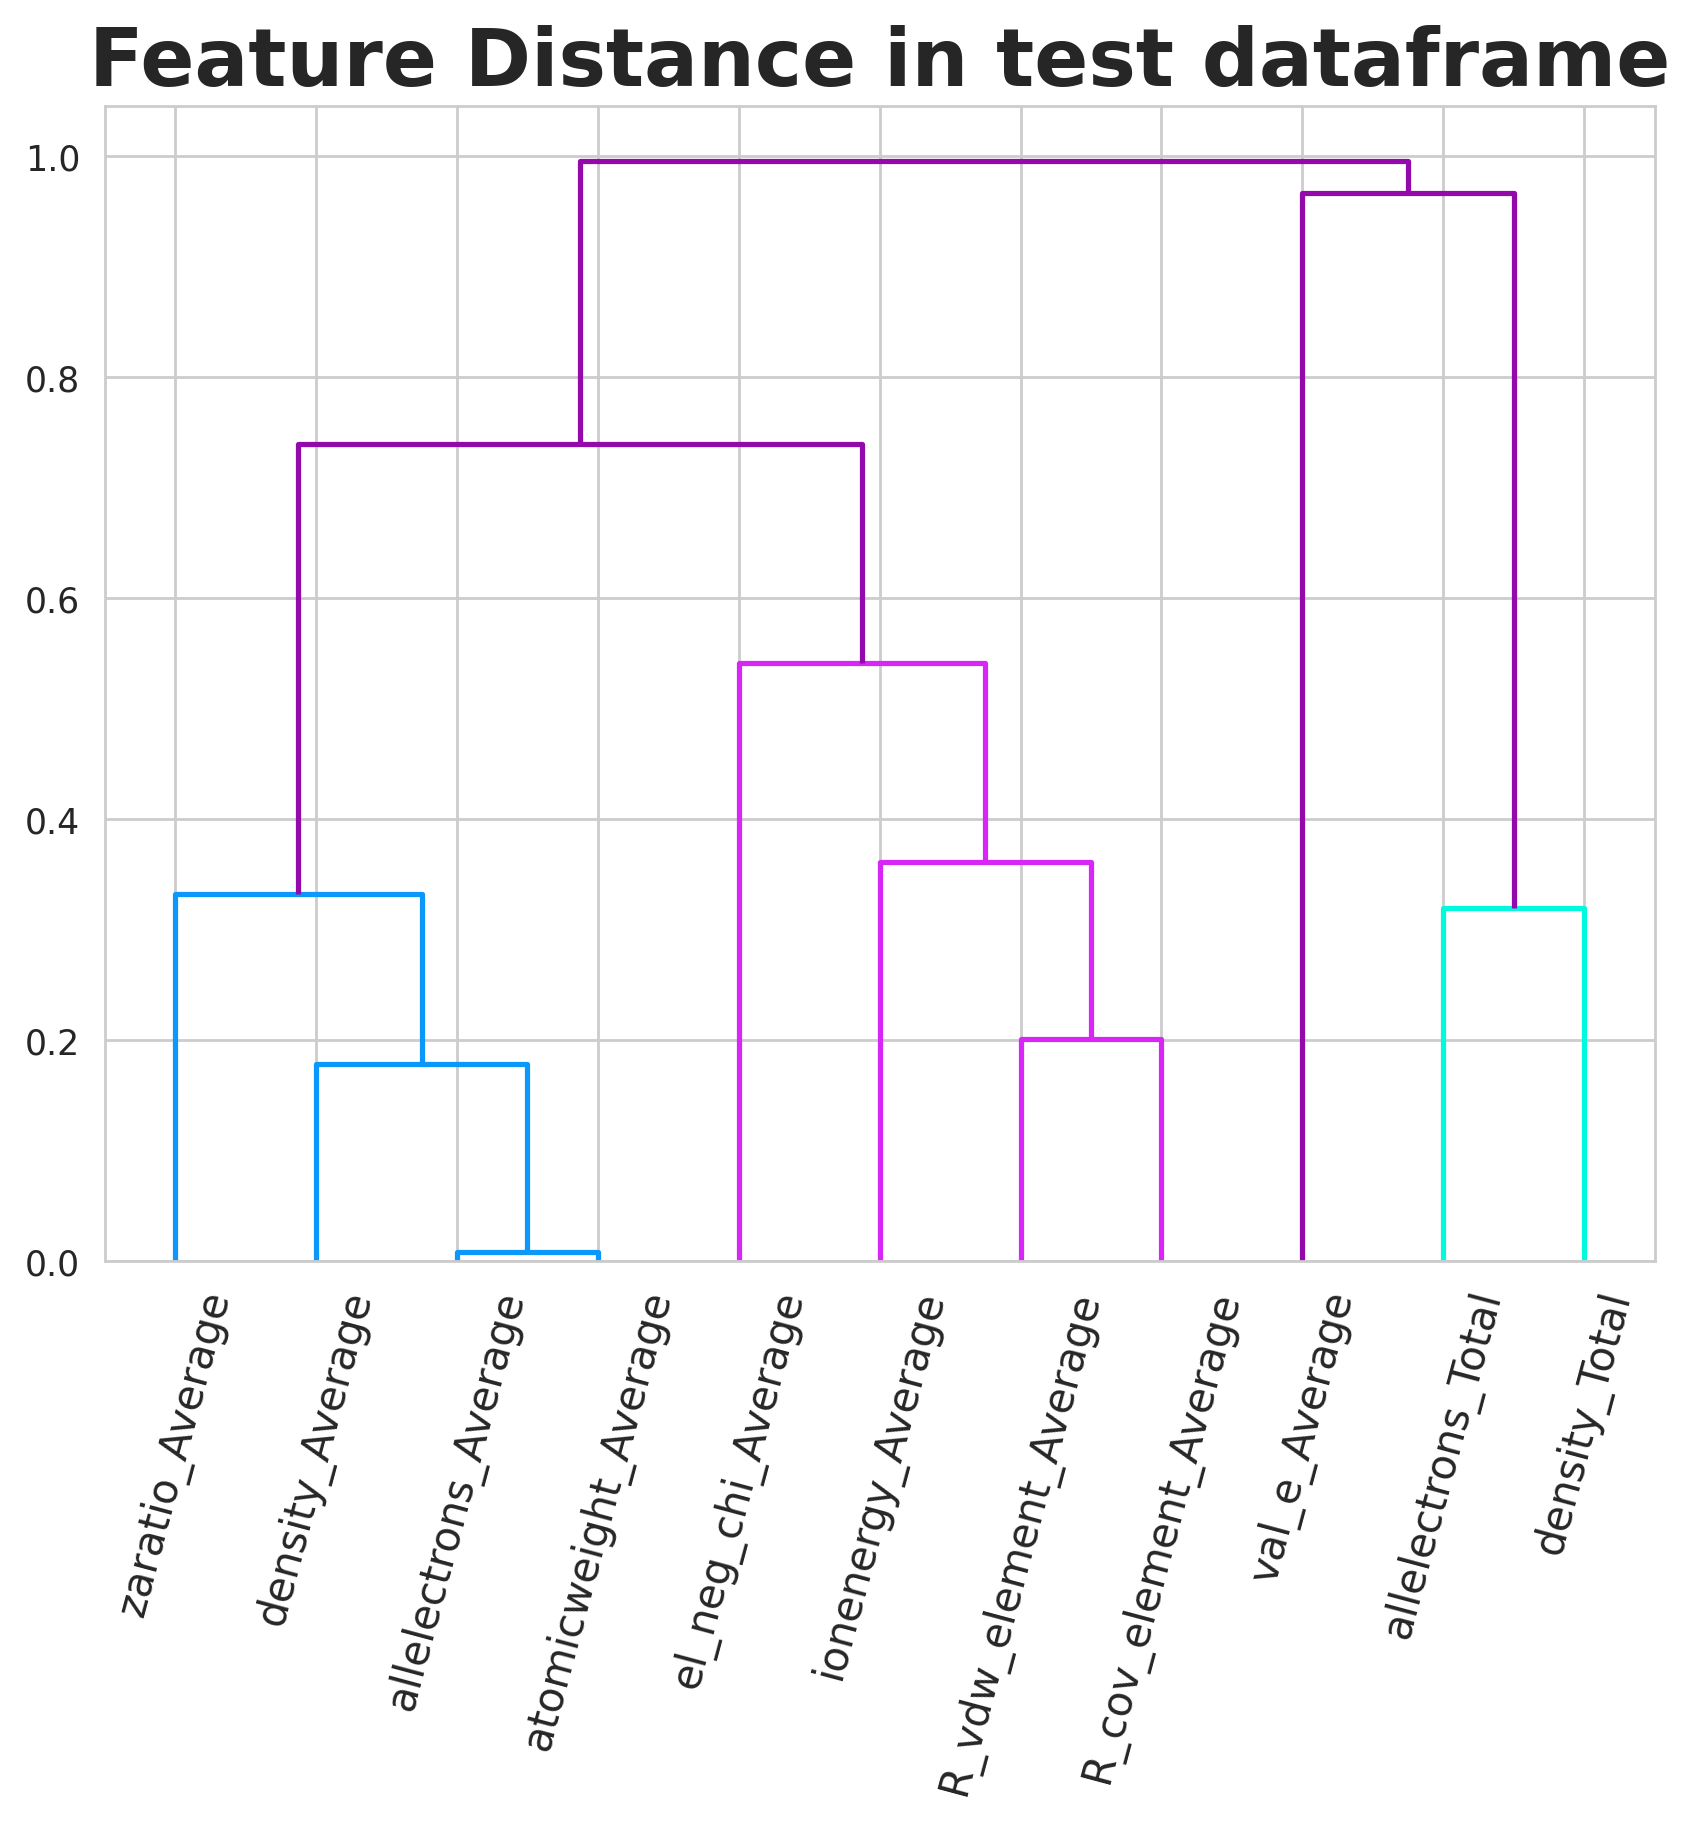

None

In [25]:
display(dist_tree(train_df, "combined train dataframe"))
display(dist_tree(test_ps_df, "test dataframe"))

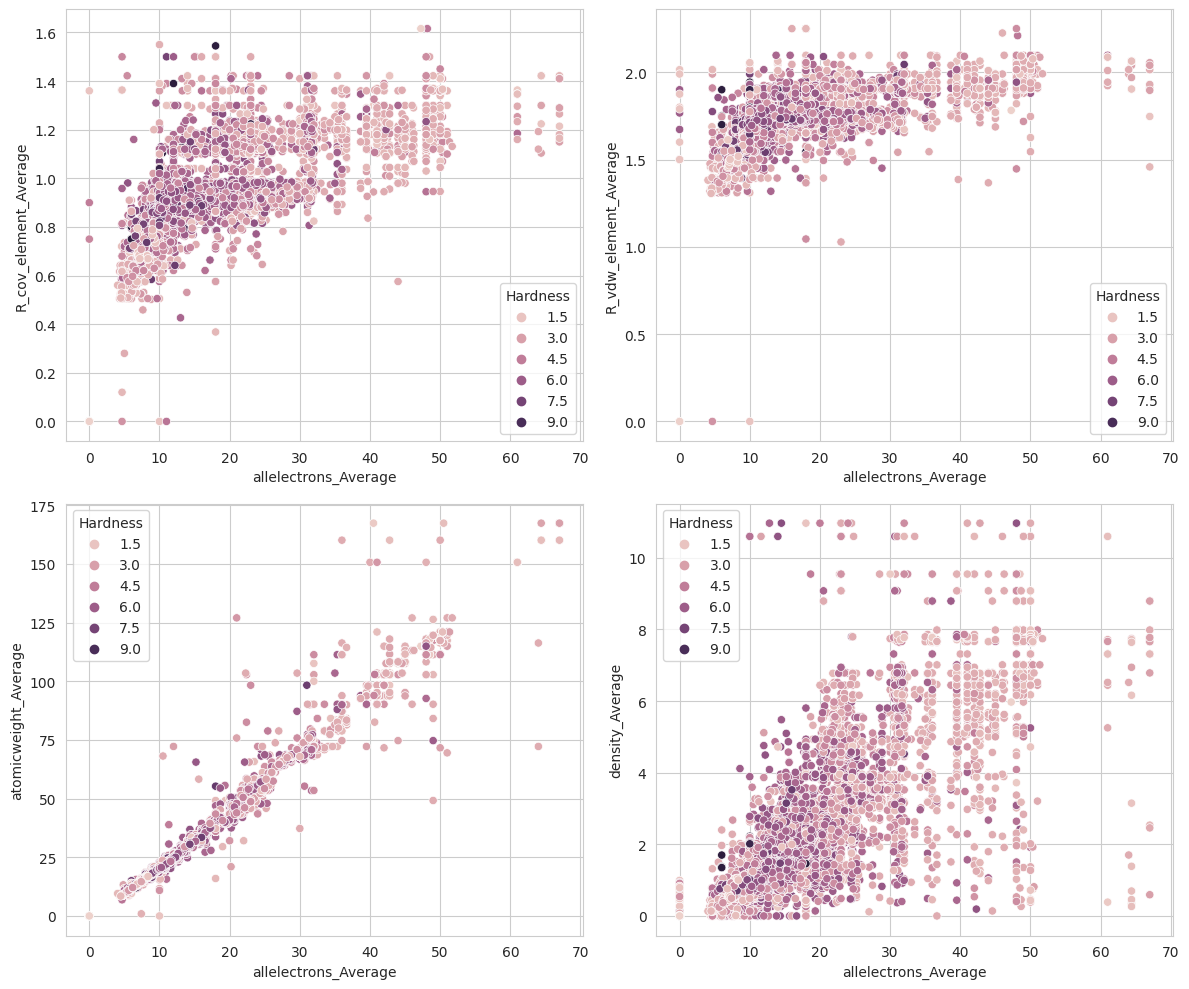

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.scatterplot(data=train_df, x=ALLELECTRONS_AVERAGE, y='R_cov_element_Average', hue=TARGET, ax=axes[0, 0])
sns.scatterplot(data=train_df, x=ALLELECTRONS_AVERAGE, y='R_vdw_element_Average', hue=TARGET, ax=axes[0, 1])
sns.scatterplot(data=train_df, x=ALLELECTRONS_AVERAGE, y='atomicweight_Average' , hue=TARGET, ax=axes[1, 0])
sns.scatterplot(data=train_df, x=ALLELECTRONS_AVERAGE, y='density_Average', hue=TARGET, ax=axes[1, 1])

plt.tight_layout()
plt.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">NN data preparation</p>

In [27]:
features = ['allelectrons_Total', 'density_Total', ALLELECTRONS_AVERAGE,
            'val_e_Average', 'atomicweight_Average', 'ionenergy_Average',
            'el_neg_chi_Average', 'R_vdw_element_Average', 'R_cov_element_Average',
            'zaratio_Average', 'density_Average', TARGET]

In [28]:
X = train_df[features].drop(columns=TARGET)
y = train_df.Hardness

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model</p>

In [29]:
X = train_df.reset_index(drop = True)
y = X.pop(TARGET).reset_index(drop = True)

In [30]:
X

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.914570
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.717600
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.506330
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.789370
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.864810
...,...,...,...,...,...,...,...,...,...,...,...
11024,46.0,9.133000,23.000000,4.000000,48.719500,9.877100,2.115000,1.905000,1.120000,0.478880,4.566500
11025,86.0,6.674328,14.333333,5.166667,30.645954,11.862733,2.861667,1.700000,0.901667,0.487172,1.112388
11026,38.0,7.134332,19.000000,4.000000,40.689515,11.506150,2.545000,1.765000,0.920000,0.479405,3.567166
11027,86.0,8.841328,14.333333,5.000000,30.550687,11.543000,2.831667,1.735000,0.890000,0.489507,1.473555


In [31]:
score_list, oof_list = pd.DataFrame(), pd.DataFrame()


models = [
    ("CB_REG", CatBoostRegressor(
                            iterations=300,
                            depth=9,
                            verbose = 0,
                            subsample=SUBSAMPLE,
                            reg_lambda=0.075,
                            objective = "MAE",
                            random_state = SEED,
                            learning_rate=LR,
                            min_child_samples=96,
                            colsample_bylevel=0.55,
    )),
    ("XGB_REG", XGBRegressor(
                        gamma=0.022,
                        max_depth=9,
                        subsample=SUBSAMPLE,
                        reg_alpha=0.003,
                        reg_lambda=0.001,
                        n_estimators=169, 
                        random_state = SEED, 
                        min_child_weight=10, 
                        learning_rate=LR,
                        colsample_bytree=0.95,
                        objective = "reg:absoluteerror"
    )),
    ("GB_REG", GradientBoostingRegressor(
                                    alpha=0.45,
                                    max_depth=8, 
                                    subsample=SUBSAMPLE,
                                    n_estimators=271, 
                                    min_samples_leaf=9, 
                                    learning_rate=LR,
                                    random_state = SEED,
                                    min_samples_split=15,
                                    loss = "absolute_error"
    )),
    ("HGB_REG", HistGradientBoostingRegressor(
                                        max_iter=251,
                                        max_depth=10, 
                                        max_leaf_nodes=776,
                                        learning_rate=LR,
                                        random_state = SEED,
                                        min_samples_leaf=16, 
                                        l2_regularization=1.2,
                                        loss = "absolute_error",
    )),   
]

for (label, model) in models:
     score_list[label], oof_list[label] = cvs(model, m_name = label, train_or_df = mineral_df)



CB_REG
Validation Score: 1.03904 ± 0.07633 
Train Score: 1.03978 ± 0.07941


XGB_REG
Validation Score: 1.03924 ± 0.07797 
Train Score: 1.03971 ± 0.07970


GB_REG
Validation Score: 1.03890 ± 0.07657 
Train Score: 1.03962 ± 0.07949


HGB_REG
Validation Score: 1.03892 ± 0.07696 
Train Score: 1.03945 ± 0.07940


In [32]:
weights = LADRegression().fit(oof_list, train_df.Hardness).coef_
pd.DataFrame(weights, index = oof_list.columns, columns = ["Model/Weight"])

,Model/Weight
CB_REG,175.680912
XGB_REG,-981.336418
GB_REG,550.702453
HGB_REG,255.745987


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Prediction</p>

In [33]:
v_reg = VotingRegressor(models, weights = weights)
nu = cvs(v_reg)




Validation Score: 0.66521 ± 0.00998 
Train Score: 0.64269 ± 0.00448


In [34]:
f_model = clone(v_reg)
f_model.fit(X, y)

VotingRegressor(estimators=[('CB_REG',
                             <catboost.core.CatBoostRegressor object at 0x7d77413776d0>),
                            ('XGB_REG',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.95, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.022, grow_pol...
                                                       max_depth=8,
                                                       min_samples_leaf=9,
                                                       min_samples_split=15,
                                                       n_estimators=271,
                                                       random_state=500,
                                                       subsample=0.95)),
                            ('HGB_REG',
                             HistGradientBoostingRegressor(l2_regularization=1.2,
                                                           learning_rate=1e-05,
                                                           loss='absolute_error',
                                                           max_depth=10,
                                                           max_iter=251,
                                                           max_leaf_nodes=776,
                                                           min_samples_leaf=16,
                                                           random_state=500))],
                weights=array([ 175.68091193, -981.3364179 ,  550.7024533 ,  255.74598697]))

In [35]:
submission_df[TARGET] = f_model.predict(test_ps_df)

In [36]:
pre_LGBM_model = LGBMRegressor()
pre_LGBM_model.fit(X, y)
X_NN = X.copy()
X_NN["Hardness_p"] = pre_LGBM_model.predict(X)

In [37]:
model = nn_model()
history = model.fit(X_NN.astype("float32"), y.astype("float32"),
                    epochs=EPOCHS,
                    class_weight=pre_LGBM_model.class_weight,
                    callbacks=callbacks_list,
                    validation_split=0.1)

Epoch 1/400
311/311 [==============================] - 2s 2ms/step - loss: 1.3226 - metric_fn: 5.7799 - val_loss: 0.9306 - val_metric_fn: 9.1068 - lr: 0.0130
Epoch 2/400
311/311 [==============================] - 0s 1ms/step - loss: 0.9400 - metric_fn: 4.2603 - val_loss: 0.6517 - val_metric_fn: 3.1832 - lr: 0.0130
Epoch 3/400
311/311 [==============================] - 0s 1ms/step - loss: 0.7862 - metric_fn: 3.1833 - val_loss: 0.6759 - val_metric_fn: 3.1285 - lr: 0.0130
Epoch 4/400
311/311 [==============================] - 0s 1ms/step - loss: 0.7347 - metric_fn: 3.1024 - val_loss: 0.5577 - val_metric_fn: 3.4238 - lr: 0.0130
Epoch 5/400
311/311 [==============================] - 0s 1ms/step - loss: 0.6825 - metric_fn: 3.0632 - val_loss: 0.9997 - val_metric_fn: 3.1417 - lr: 0.0130
Epoch 6/400
311/311 [==============================] - 0s 2ms/step - loss: 0.6026 - metric_fn: 3.1847 - val_loss: 0.5262 - val_metric_fn: 2.5294 - lr: 0.0130
Epoch 7/400
311/311 [==============================]

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [38]:
test_df = pd.read_csv(TEST_PS_PATH)

In [39]:
test_df["Hardness_p"] = pre_LGBM_model.predict(test_df.astype("float32").drop(columns=ID))
test_df[TARGET] = model.predict(test_df.astype("float32").drop(columns=ID))
submission_df = test_df[[ID, TARGET]]
submission_df.to_csv("submission.csv", index=False)

217/217 [==============================] - 0s 775us/step


In [40]:
# submission_df.set_index(ID, inplace=True)
# submission_df.Hardness.to_csv('submission.csv')

In [41]:
submission_df

,id,Hardness
0,10407,2.449456
1,10408,2.633773
2,10409,5.750825
3,10410,4.723025
4,10411,5.750825
...,...,...
6934,17341,5.750825
6935,17342,3.983976
6936,17343,5.750825
6937,17344,5.248167
